In [31]:
from Exchange import *

In [ ]:
# Interface
import exchange
env = exchange.make()
observation, info =  env.reset(return_info = True)
for _ in range(1000):
    action = policy(observation)
    observation, reward, done, info = env.step(action)
    if done:
        observation, info = env.reset(return_info = True)
env.close()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib.pyplot import figure
Flow = pd.read_csv(r"Data/AMZN_2021-04-01_34200000_57600000_message_10.csv")
Book = pd.read_csv(r"Data/AMZN_2021-04-01_34200000_57600000_orderbook_10.csv")

In [ ]:
picture_play_rate = 0.05
for index in range(Book.shape[0]):
    figure(figsize=(8, 6), dpi=80)
    price = Book.iloc[index,[i%2==0 for i in range(Book.shape[1])]]/10000.0
    quantity = Book.iloc[index,[i%2==1 for i in range(Book.shape[1])]]
    sc = pd.Series(quantity.tolist(), index = price.tolist())
    df = sc.sort_index()
    plt.step(df.index.tolist(), df.values.tolist())
    plt.hlines(0,min(df.index.tolist()),max(df.index.tolist()),color="red")
    plt.show()
    time.sleep(picture_play_rate)

In [68]:
# def format_converting():
index = 0
List = Flow.iloc[index,:].tolist()
slice = lambda x:'bid' if x==1 else 'ask'
Flow.shape

(361124, 7)

In [40]:
Tuple = tuple(
    (
    str(List[2]), # ticket id 
    # List[1], # order type
    '1', # order type
    slice(List[5]),
    List[4]/10000.0, # price
    List[3], # quantity
    # List[0], # order time
    str(List[2]), # number
    "AMZN" # stock code
    )
    )
Tuple

('0', '1', 'bid', 3117.8, 48, '0', 'AMZN')

In [69]:
initial_order = (0, 3117.8, "AAPL", 20)
exchange = Exchange(*initial_order)

for index in range(Flow.shape[0]):
    # index = 0
    List = Flow.iloc[index,:].tolist()
    slice = lambda x:'bid' if x==1 else 'ask'
    Tuple = tuple(
        (
        str(List[2]), # ticket id 
        # List[1], # order type
        '1', # order type
        slice(List[5]),
        List[4]/10000.0, # price
        List[3], # quantity
        # List[0], # order time
        str(List[2]), # number
        "AMZN" # stock code
        )
        )
    order1= Order(*Tuple)
    Time = str(List[0])
    if Tuple[2] == "ask":
        price = exchange.process_order_A(Time,order1)
        print(">>> Excuting ask order at time: ", Time)
    elif Tuple[2] == "bid":
        price = exchange.process_order_B(Time,order1)
        print(">>> Excuting bid order at time: ", Time)
    print("Price:",price)
    time.sleep(0.5)

>>> Excuting bid order at time:  34200.007414862
Price: None
>>> Excuting ask order at time:  34200.012480374
Price: 20
>>> Excuting bid order at time:  34200.029034007
Price: None
>>> Excuting bid order at time:  34200.047196337
Price: None
>>> Excuting bid order at time:  34200.131106156
Price: None
>>> Excuting bid order at time:  34200.16334803
Price: None
>>> Excuting bid order at time:  34200.205767779
Price: None
>>> Excuting bid order at time:  34200.267909994
Price: None
>>> Excuting bid order at time:  34200.267915367
Price: None
>>> Excuting bid order at time:  34200.286192455
Price: None
>>> Excuting bid order at time:  34200.290719105
Price: None
>>> Excuting bid order at time:  34200.292133181
Price: None
>>> Excuting bid order at time:  34200.474586908
Price: None
>>> Excuting bid order at time:  34200.474735163
Price: None
>>> Excuting ask order at time:  34200.62734711
Price: 20
>>> Excuting ask order at time:  34200.657345238
Price: 20
>>> Excuting ask order at time: 

KeyboardInterrupt: 

In [65]:
order1= Order(*Tuple)
Time = str(List[0])
if Tuple[2] == "ask":
    price = exchange.process_order_A(Time,order1)
    print(">>> Excuting ask order at time: ", Time)
elif Tuple[2] == "bid":
    price = exchange.process_order_B(Time,order1)
    print(">>> Excuting bid order at time: ", Time)
print("Price:",price)

>>> Excuting bid order at time:  34200.007414862
Price: None


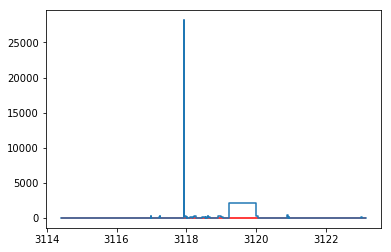

In [91]:
bids = exchange.return_info()[2]
asks = exchange.return_info()[3]
Bids = pd.DataFrame(bids,columns=["price","quantity"])
Asks = pd.DataFrame(asks,columns=["price","quantity"])
New = pd.concat([Bids,Asks])
New.set_index("price",inplace = True)
plt.step(New.index.tolist(), New.values.tolist())
plt.hlines(0,min(New.index.tolist()),max(New.index.tolist()),color="red")
plt.show()

In [ ]:
exchange.tape